In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv('auto-mpg.csv')

In [49]:
#displaying the features
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [50]:
#displaying top most 5 values
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
#description before converting hp into float
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [52]:
data.size

3582

In [53]:
#data types of all features
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [119]:
#displaying the count of each unique value in data
data["horsepower"].value_counts().head()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
Name: horsepower, dtype: int64

In [87]:
#as hp contains values with "?" writing a contion to remove them
data = data[data["horsepower"] != '?']
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [88]:
#here actually horsepower is a numeric and car is a string but it is showing it as object type
#Converting object to float and strings types
data["horsepower"] = data['horsepower'].astype(float)

In [89]:
data["car name"] = data["car name"].astype(str)

In [90]:
data.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [92]:
data.var()

C:\Users\ML Lab\AppData\Local\Temp\ipykernel_6324\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


mpg                 60.918142
cylinders            2.909696
displacement     10950.367554
horsepower        1481.569393
weight          721484.709008
acceleration         7.611331
model year          13.569915
origin               0.648860
dtype: float64

In [93]:
data.mode()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.0,4.0,97.0,150.0,1985.0,14.5,73.0,1.0,amc matador
1,NaN,NaN,NaN,NaN,2130.0,NaN,NaN,NaN,ford pinto
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota corolla


In [94]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<AxesSubplot:title={'center':'Simple plot'}, xlabel='cylinders', ylabel='mpg'>

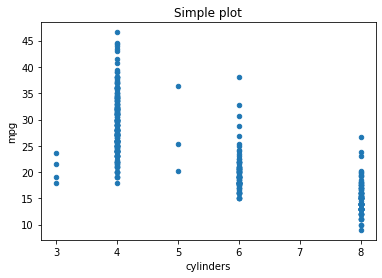

In [95]:
data.plot(kind='scatter', x='cylinders', y='mpg', xlabel='cylinders', ylabel='mpg',
       title='Simple plot')

In [118]:
data["car name"].value_counts().head()

amc matador       5
ford pinto        5
toyota corolla    5
toyota corona     4
amc hornet        4
Name: car name, dtype: int64

In [103]:
#finding correleation of each features
corr_mat = data.corr()
corr_mat

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [106]:
#finding correleation of mpg attribute only
corr_mat["mpg"]

mpg             1.000000
cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
Name: mpg, dtype: float64

In [109]:
#corr values of mpg sorted in descinding order
corr_mat["mpg"].sort_values(ascending=False)

mpg             1.000000
model year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

<AxesSubplot:>

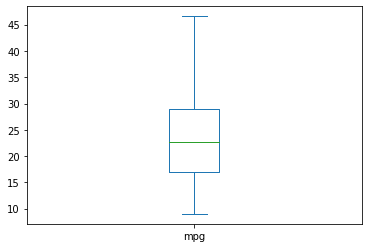

In [111]:
data['mpg'].plot(kind='box')

<AxesSubplot:>

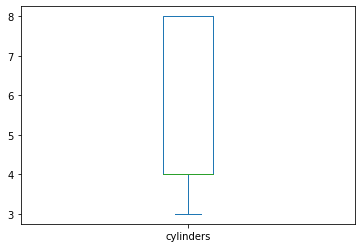

In [112]:
data['cylinders'].plot(kind='box')

<AxesSubplot:>

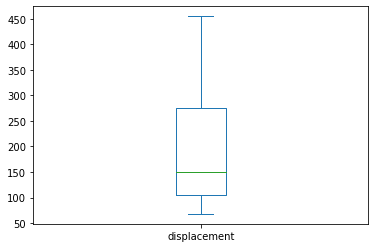

In [115]:
data['displacement'].plot(kind='box')

<AxesSubplot:>

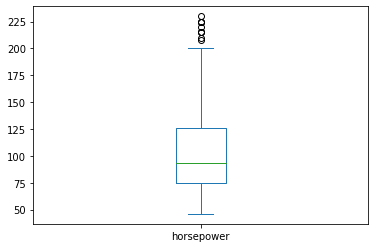

In [116]:
data['horsepower'].plot(kind='box')

<AxesSubplot:>

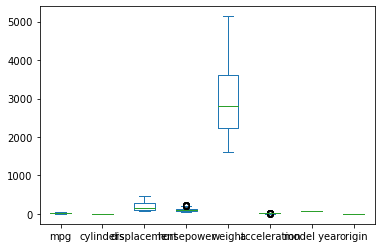

In [117]:
data['mpg'].plot(kind='box')